In [ ]:
# Resource
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-05-07 04:41:20--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-05-07 04:41:20--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-05-07 04:41:21--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

In [ ]:
# Import
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# 이전에는 사과 바나나 이렇게 정확히 타깃이 주어졌지만
# 안주어지면 k-평균 군집 알고리즘이 평균값을 자동으로 찾아준다.
# 이 평균값이 클러스터의 중심에 위치하기 때문에 클러스터 중심, 센트로이드라고 불린다.

'''
k-평균 알고리즘 작동 방법.
1. 무작위로 k개의 클러스터 중심을 정한다
2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정한다.
3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경한다.
4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복한다.
'''
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [ ]:
# 책에는 randomState 42로 나와있는데 안됨.
km = KMeans(n_clusters=3)
km.fit(fruits_2d)
# print(km.labels_) # 이렇게 하면 어느 클러스터에 속하는지 보여준다.
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 98,  91, 111]))


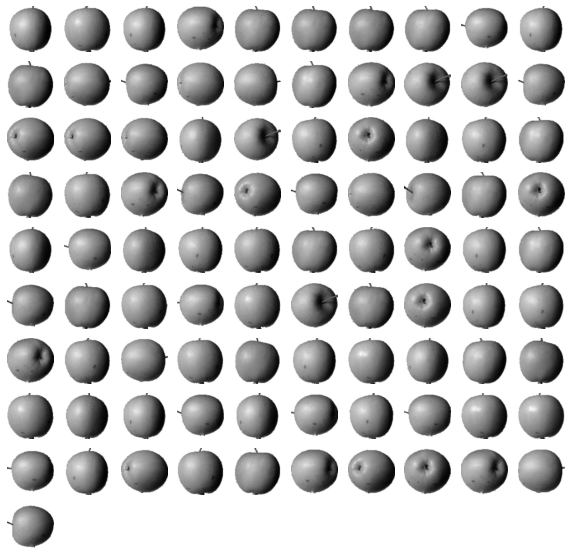

In [ ]:
def draw_fruits(arr,ratio=1):
  n=len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows,cols,figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10+j<n:
        axs[i,j].imshow(arr[i*10 + j], cmap="gray_r")
      axs[i,j].axis('off')
  plt.show()
draw_fruits(fruits[km.labels_==1])

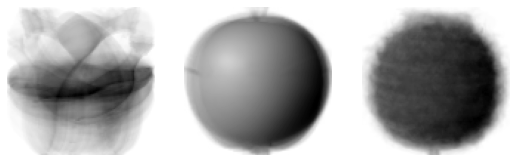

[[8837.37750892 5267.70439881 3393.8136117 ]]
[2]


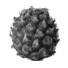

4


In [ ]:
# 스스로 찾은 클러스터 중심은 cluster_centers_에 저장되어 있음.
draw_fruits(km.cluster_centers_.reshape(-1,100,100),ratio=3)

# transform 함수는 클러스터 중심과의 거리를 계산하는 함수이다.
print(km.transform(fruits_2d[100:101]))

print(km.predict(fruits_2d[100:101]))
draw_fruits(fruits[100:101])

print(km.n_iter_)

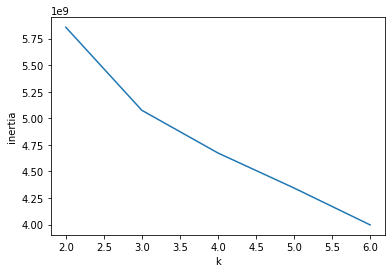

In [ ]:
# 여기서 문제는 클러스터의 개수를 사전에 지정했다는 점이다.
# 실전에서는 알 수 없을 뿐더러 설정할 완벽한 방법도 없다.
# 대표적인 방법인 엘보우 방법이 있다.

# 이너셔: 클러스터 중심과 클러스터에 속한 샘플 사이의 거리를 잰 것.

# 클러스터 개수를 증가시키면서 이너셔의 추이를 보면 감소하는 속도가 변화하는 지점이 있다. (이 모양이 닮아서 엘보우라고 하는거다.)

inertia =[]
for k in range(2,7):
  km=KMeans(n_clusters=k,random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()